In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

In [2]:
# 1. Load IMDB Dataset
max_features = 10000 # Vocabulary size
max_len = 200

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words = max_features)

# Pad sequences to ensure equal length
x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen = max_len)
x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test, maxlen = max_len)


In [4]:
# construct Simple RNN
model = models.Sequential([
    layers.Embedding(input_dim = max_features, output_dim = 128), 
    layers.SimpleRNN(64, return_sequences=False), 
    layers.Dense(1, activation = 'sigmoid')
])

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [5]:
# Train the Model
history = model.fit(
    x_train, y_train, 
    validation_split = 0.2, 
    epochs = 10, 
    batch_size = 64, 
    verbose = 1
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 101ms/step - accuracy: 0.6788 - loss: 0.5771 - val_accuracy: 0.7400 - val_loss: 0.5177
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.7878 - loss: 0.4572 - val_accuracy: 0.6674 - val_loss: 0.6320
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - accuracy: 0.9083 - loss: 0.2371 - val_accuracy: 0.7534 - val_loss: 0.5877
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.9781 - loss: 0.0711 - val_accuracy: 0.7814 - val_loss: 0.6576
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - accuracy: 0.9971 - loss: 0.0169 - val_accuracy: 0.7526 - val_loss: 0.8282
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9995 - loss: 0.0057 - val_accuracy: 0.7838 - val_loss: 0.8064
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 99ms/step - accuracy: 0.9999 - loss: 0.0017 - val_accuracy: 0.7802 - val_loss: 0.8711
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 100ms/step - accuracy: 0.9999 - loss: 0.001

In [6]:
# Visualise the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:4f}")

Test Accuracy: 0.780960


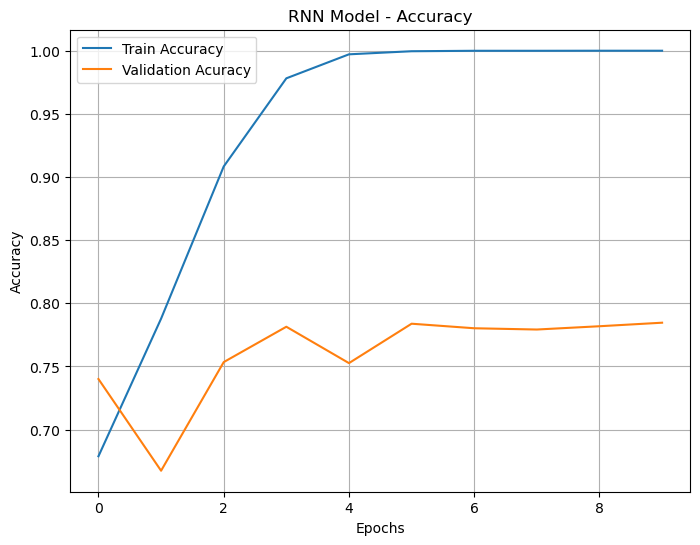

In [7]:
# Plot validation accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Acuracy')
plt.title("RNN Model - Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

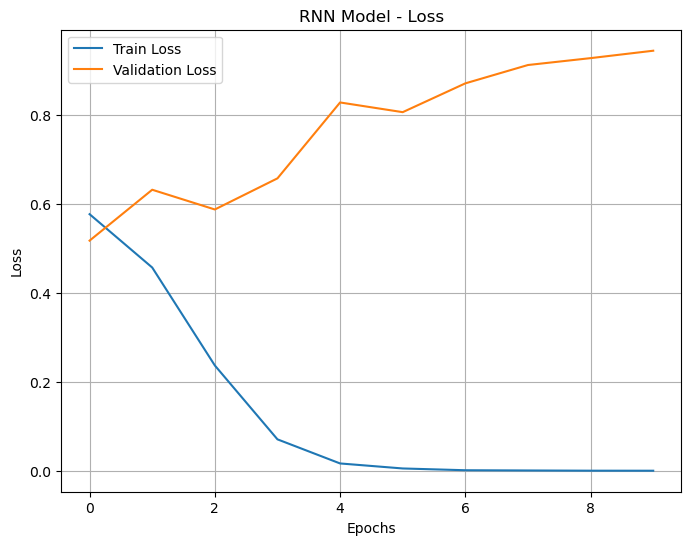

In [8]:
# Validation Loss
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("RNN Model - Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Get sample predictions for the test set
predictions = model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step


In [10]:
# Converrt predictions to binary labels (0 or 1)
predicted_labels = (predictions > 0.5).astype(int).flatten()

In [11]:
# Display some sample predictions
print("Sample Predictions: ")
for i in range(10): 
    print(f"Review {i+1}: True Label = {y_test[i]}, Predicted Label = {predicted_labels[i]}")

Sample Predictions: 
Review 1: True Label = 0, Predicted Label = 0
Review 2: True Label = 1, Predicted Label = 1
Review 3: True Label = 1, Predicted Label = 0
Review 4: True Label = 0, Predicted Label = 1
Review 5: True Label = 1, Predicted Label = 1
Review 6: True Label = 1, Predicted Label = 0
Review 7: True Label = 1, Predicted Label = 1
Review 8: True Label = 0, Predicted Label = 0
Review 9: True Label = 0, Predicted Label = 0
Review 10: True Label = 1, Predicted Label = 1


In [12]:
# Generate predictions for the entire test set
# Predictions were already generated in the previous cell and stored in predicted_labels

# Flatten true labels
y_true = y_test # y_test is already a numpy array of true labels

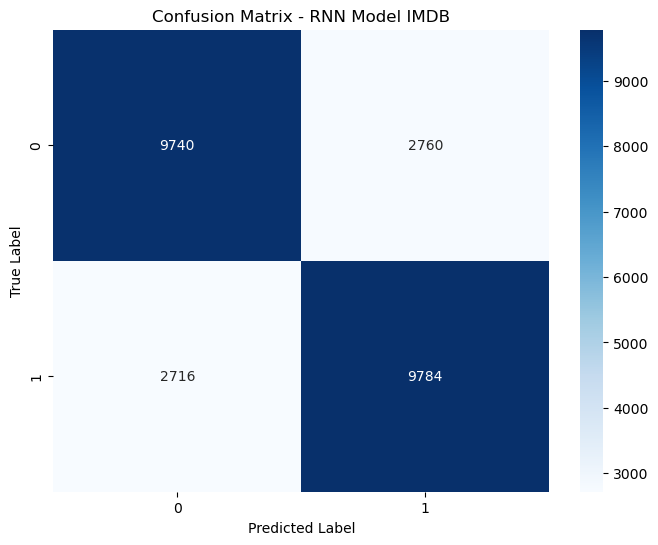

In [13]:
# Plot confusion matrix
cm = confusion_matrix(y_true, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - RNN Model IMDB")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [14]:
# Classification Report
print("\nClassification Report - RNN Model IMDB") 
print(classification_report(y_true, predicted_labels, zero_division=0))


Classification Report - RNN Model IMDB
              precision    recall  f1-score   support

           0       0.78      0.78      0.78     12500
           1       0.78      0.78      0.78     12500

    accuracy                           0.78     25000
   macro avg       0.78      0.78      0.78     25000
weighted avg       0.78      0.78      0.78     25000

